# Fingerprinting 

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import sleep
import math

## punkty pomiarowe

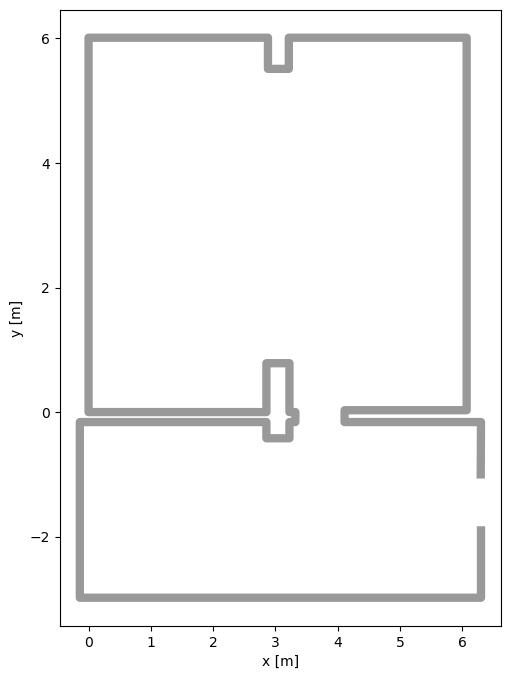

In [31]:
def layout():
    walls = np.array([[6.44 , 1.08 ],
       [6.44 , 1.08 ],
       [6.44 , 0.   ],
       [0.   , 0.   ],
       [0.   , 2.82 ],
       [2.995, 2.82 ],
       [2.995, 2.56 ],
       [3.365, 2.56 ],
       [3.365, 2.82 ],
       [3.46 , 2.82 ],
       [3.46 , 2.98 ],
       [3.365, 2.98 ],
       [3.365, 3.765],
       [2.995, 3.765],
       [2.995, 2.98 ],
       [0.14 , 2.98 ],
       [0.14 , 8.99 ],
       [3.02 , 8.99 ],
       [3.02 , 8.49 ],
       [3.355, 8.49 ],
       [3.355, 8.99 ],
       [6.21 , 8.99 ],
       [6.21 , 3.01 ],
       [4.25 , 3.01 ],
       [4.25 , 2.82 ],
       [6.44 , 2.82 ],
       [6.436, 1.98 ],
       [6.436, 1.98 ]])
    
    return walls







layout = layout()-np.r_[0.14,2.98]

plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')
plt.plot(layout[:,0], layout[:,1], linewidth=6, color=np.array([1,1,1])*0.6)

plt.xlabel('x [m]')
plt.ylabel('y [m]')

#plt.legend()

plt.show()


In [32]:
def group_rssi(df):

    rssi = []
    for n,g  in df.groupby(by=['packNum', 'acc[0]']): # zgrupowanie po packNum i acc - bo jest takie samo we wszystkich pakietach
        anchor_means = g.groupby('anchorID').mean().reset_index() # obliczenie średniej za anchor
        rssi_dict = {i:-rssi for i,rssi in zip(anchor_means.index, anchor_means.rssi)}

        
        rssi.append(rssi_dict)
        
    return pd.DataFrame.from_records(rssi).dropna().values

In [33]:
x_axis = {
    1: '-14.7', 2: '-14' ,3: '-14', 4:'-13.3', 5:'-12.6',
    6:'-12.6', 7:'-11.9', 8:'-11.2', 9:'-11.2', 10:'-10.5',
    11:'-9.8', 12:'-9.8', 13:'-9.1', 14:'-8.4', 15:'-8.4',
    16:'-7.7', 17:'-7', 18:'-7', 19:'-6.3', 20:'-5.6',
    21:'-5.6', 22:'-4.9', 23:'-4.2', 24:'-4.2', 25:'-3.5',
    26:'-2.8', 27:'-2.8', 28:'-2.1',29:'-1.4', 30:'-1.4',
    31:'-0.7', 32:'0', 33:'0', 34:'0.66', 35:'1.9',
    36:'2.76', 37:'3.62', 38:'-0.7', 39:'-2.1', 40:'-1.4',
    41:'0', 42:'1.4', 43:'0.7', 44:'-0.7', 45:'-2.1',
    46:'-2.8', 47:'-1.4', 48:'0', 49:'1.4', 50:'0.7',
    51:'-0.7', 52:'-2.1', 53:'-1.4', 54:'0', 55:'1.4',
    56:'0.7', 57:'-0.7', 58:'-2.1',
    
}


y_axis = {
	1: '1.42', 2:'2.17', 3:'0.67', 4: '1.42', 5:'2.17',
    6:'0.67', 7: '1.42', 8:'2.17', 9:'0.67', 10: '1.42',
    11:'2.17', 12:'0.67', 13: '1.42', 14:'2.17', 15:'0.67',
    16: '1.42', 17:'2.17', 18:'0.67', 19: '1.42', 20:'2.17',
    21:'0.67', 22: '1.42', 23:'2.17', 24:'0.67',25: '1.42',
    26:'2.17', 27:'0.67', 28: '1.42', 29:'2.17', 30:'0.67',
    31: '1.42', 32: '2.17', 33: '0.67', 34: '1.49', 35: '1.49',
    36: '1.49', 37:'1.49', 38: '2.92', 39: '2.92', 40: '3.67',
    41: '3.67', 42: '3.67', 43: '4.42', 44: '4.42', 45: '4.42',
    46: '5.17', 47: '5.17', 48:'5.17', 49: '5.17', 50:'5.92',
    51:'5.92', 52:'5.92', 53: '6.67', 54:'6.67', 55:'6.67',
    56: '7.42', 57: '7.42', 58: '7.42'
}

anchor_x = [-2.5, -9, -2.2, 4.21, 1, -15.2]
anchor_y = [0.5, 2.2, 7.5, 1.42, 4.7, 0.5]


In [34]:
from tqdm import tqdm

In [35]:
folder_path = 'data'

radio_map = []
i=1

map_xy= []
map_rssi = []

map_avg_xy = []
map_avg_rssi = []


for i, file in tqdm(enumerate(os.listdir(folder_path))):

    df = pd.read_csv(folder_path + '\\' + file, delimiter=', ', engine='python')

    rssi = group_rssi(df)
    #print(rssi)



    map_xy.append([float(x_axis[i+1]), float(y_axis[i+1])]*np.ones((len(rssi), 2)))
    map_rssi.append(rssi)

    map_avg_xy.append([float(x_axis[i+1]), float(y_axis[i+1])])
    map_avg_rssi.append(rssi.mean(axis=0))

map_xy = np.vstack(map_xy)
map_rssi = np.vstack(map_rssi)

map_avg_xy = np.vstack(map_avg_xy)
map_avg_rssi = np.vstack(map_avg_rssi)

58it [00:04, 12.84it/s]


folder_path = 'data'

radio_map = []
i=1

map_xy= []
map_rssi = []
for file in os.listdir(folder_path):
        
    df = pd.read_csv(folder_path + '\\' + file, delimiter=', ')
    
    grouped = df.groupby('anchorID')
    grouped_dfs = {name: group for name, group in grouped}

    df_number_1 = grouped_dfs.get(1, pd.DataFrame())
    df_number_2 = grouped_dfs.get(2, pd.DataFrame())
    df_number_3 = grouped_dfs.get(3, pd.DataFrame())

    avg_power_1 = -df_number_1['rssi'].mean()
    avg_power_2 = -df_number_2['rssi'].mean()
    avg_power_3 = -df_number_3['rssi'].mean()
    
    
    
    #print(i)
    #print(x_axis[i])
    #print(y_axis[i])
    #print(avg_power_1)
    #print(avg_power_2)
    #print(avg_power_3)
    
    Node = [x_axis[i], y_axis[i], avg_power_1, avg_power_2, avg_power_3]
    
    map_xy.append([float(x_axis[i]), float(y_axis[i])])
    map_rssi.append([avg_power_1, avg_power_2, avg_power_3])
        
    radio_map.append(Node)
    i+=1
    
    
map_xy= np.array(map_xy)
map_rssi = np.array(map_rssi)

(0.0, 5.0)

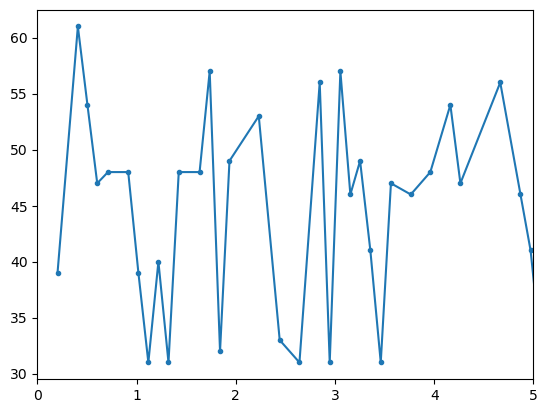

In [36]:
plt.plot(df[df['anchorID']==5].ts-df.ts.min() , df[df['anchorID']==5].rssi, marker='.')
plt.xlim(0,5)

In [37]:
im = plt.imread('plan_img.png')

(-8.0, 10.0)

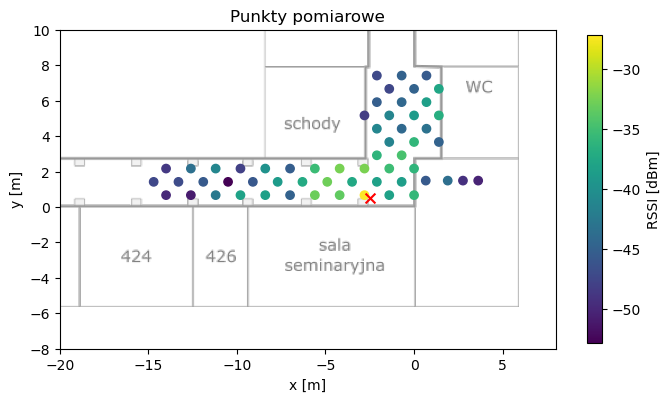

In [75]:
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')

implot = plt.imshow(im, extent = [-54.17, 5.90, -5.67 ,51.47])
plt.scatter(map_avg_xy[:,0], map_avg_xy[:,1], c= map_avg_rssi.T[0], cmap='viridis')
plt.colorbar(shrink=0.5, label='RSSI [dBm]')
plt.scatter(anchor_x[0], anchor_y[0], color = 'red', marker = 'x', s=50)

plt.title('Punkty pomiarowe')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-20, 8)
plt.ylim(-8, 10)

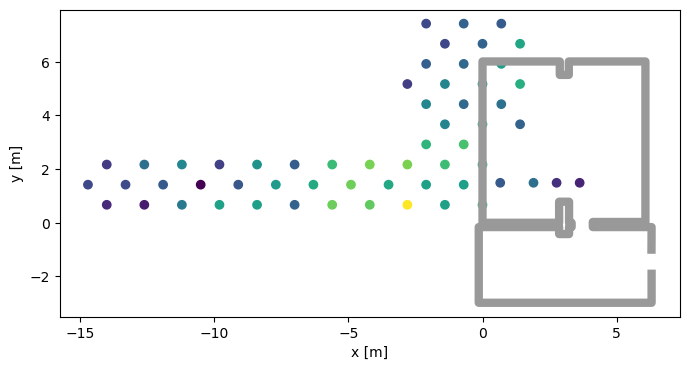

In [54]:
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')
plt.plot(layout[:,0], layout[:,1], linewidth=6, color=np.array([1,1,1])*0.6)

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.scatter(map_avg_xy[:,0], map_avg_xy[:,1], c= map_avg_rssi.T[0])
#plt.scatter(map_xy[:,0], map_xy[:,1])

In [55]:
path = pd.read_csv('received_data_2024_01_23_14;36;16.csv', delimiter=', ')
path = pd.read_csv('received_data_2024_01_23_14;38;39.csv', delimiter=', ')
#path = pd.read_csv('received_data_2024_01_23_14;36;16.csv', delimiter=', ')


path['rssi'] = -path['rssi']

C:\Users\domin\AppData\Local\Temp\ipykernel_18576\4116686594.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  path = pd.read_csv('received_data_2024_01_23_14;36;16.csv', delimiter=', ')
C:\Users\domin\AppData\Local\Temp\ipykernel_18576\4116686594.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  path = pd.read_csv('received_data_2024_01_23_14;38;39.csv', delimiter=', ')


In [77]:
path['rssi'] = -path['rssi']
anchor_list = []
for n,g  in path.groupby(by=['packNum', 'acc[0]']):
    anchor_means = g.groupby('anchorID').mean().reset_index() # obliczenie średniej za anchor
    anchor_list.append(anchor_means)

Text(0, 0.5, 'a[m/s^2]')

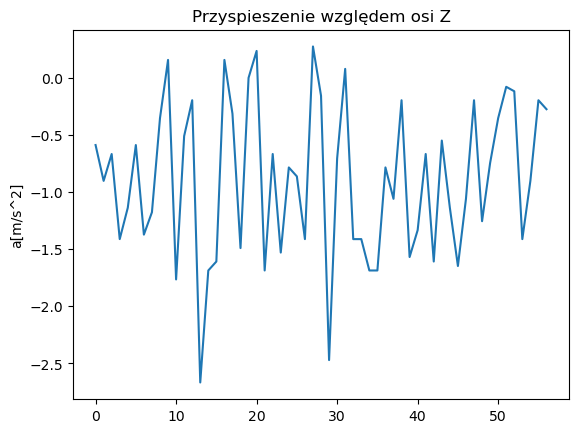

In [82]:
acc = []
n=0
for i in anchor_list:
    acc.append(anchor_list[n]['acc[1]'].mean())
    n+=1
plt.plot(acc)
plt.title('Przyspieszenie względem osi Z')
plt.ylabel('a[m/s^2]')


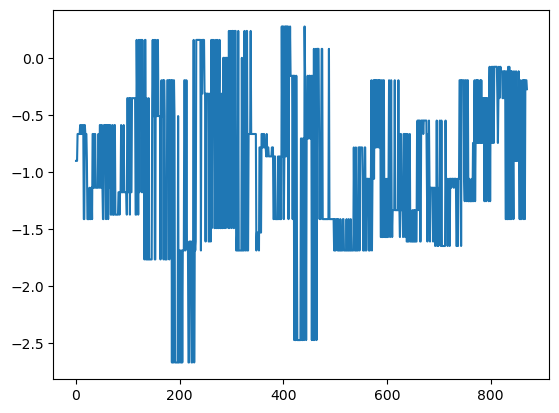

In [56]:
plt.plot(path['acc[1]'])

In [57]:
measurements = []

for n,g  in path.groupby(by=['packNum', 'acc[0]']): # zgrupowanie po packNum i acc - bo jest takie samo we wszystkich pakietach
    anchor_means = g.groupby('anchorID').mean().reset_index() # obliczenie średniej za anchor
    
    # wyciągnięcie danych do słowników - brzydko, da się to zrobić dużo lepiej
    rss_dict = {i:rssi for i,rssi in zip(anchor_means.index, anchor_means.rssi)}
    acc_dict = {a:acc for a,acc in zip(['acc[0]', 'acc[1]','acc[2]'], anchor_means[['acc[0]', 'acc[1]','acc[2]']].values[0])}
    others_dict = {'ts': anchor_means.ts.mean(), 'dir': anchor_means['dir'].values[0]}
    group_dict = {}
    group_dict.update(rss_dict)
    group_dict.update(acc_dict)
    group_dict.update(others_dict)
    
    # zapis do listy z wynikami
    measurements.append(group_dict)
    
    
meas_path = path.from_records(measurements)

In [58]:
meas = meas_path[[i for i in range(6)]].values[:,:]

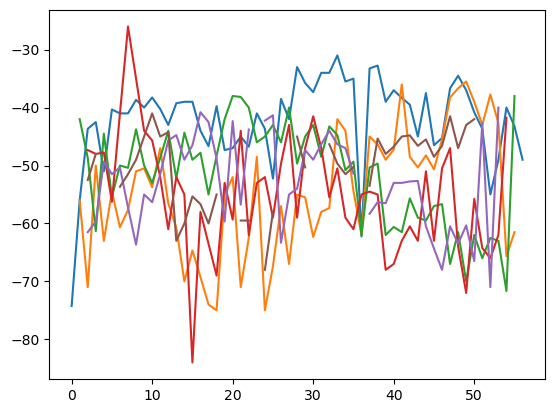

In [59]:
plt.plot(meas)

In [60]:
def localize_knn(map_xy, map_rssi, meas, k):
    locs =[]
    for m in meas:
        d = np.linalg.norm(map_rssi-m, axis=1)

        ixs = np.argsort(d)

        d_n = d[ixs[:k].ravel()]
        xy_n = map_xy[ixs[:k].ravel()]

        x = np.sum(xy_n.T*1/d_n, axis=1)/np.sum(1/d_n)
        locs.append(x)
    locs = np.vstack(locs)
    return locs

In [61]:
locs = localize_knn(map_xy, map_rssi, meas, k=3)

In [62]:
locs_avg = localize_knn(map_avg_xy, map_avg_rssi, meas, k=3)

In [63]:
locs_avg = locs_avg[np.isfinite(locs_avg).all(axis=1)]

(-8.0, 10.0)

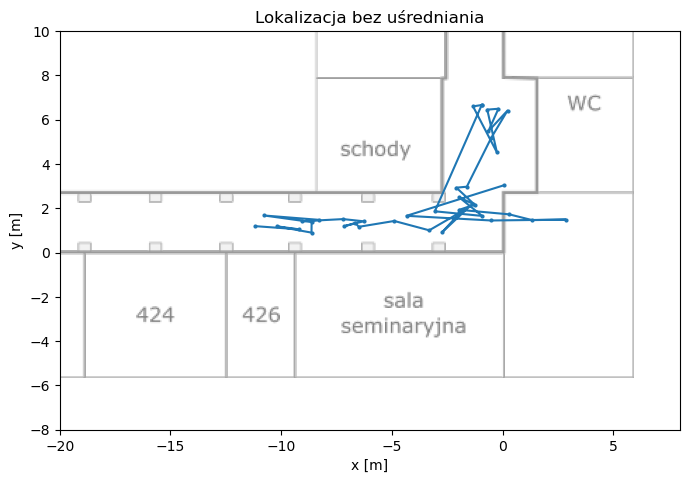

In [84]:
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')

implot = plt.imshow(im, extent = [-54.17, 5.90, -5.67 ,51.47])
plt.plot(locs_avg[:,0], locs_avg[:,1], marker='o', markersize=2)

#plt.title('Punkty pomiarowe')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Lokalizacja bez uśredniania')
plt.xlim(-20, 8)
plt.ylim(-8, 10)
#plt.colorbar(shrink=0.5, label='RSSI [dBm]')
#plt.scatter(anchor_x[5], anchor_y[5], color = 'red', marker = 'x', s=50)

In [50]:
def mov_avg(x, coeff):
    x_avg = []
    x0 = x[0]
    x_avg.append(x0)
    for p in x[1:]:
        if np.isfinite(p).all():
            x_avg.append(x_avg[-1]*coeff + (1-coeff)*p)
        
    return np.vstack(x_avg)

In [51]:
locs_m = mov_avg(locs_avg, 0.5)

(-8.0, 10.0)

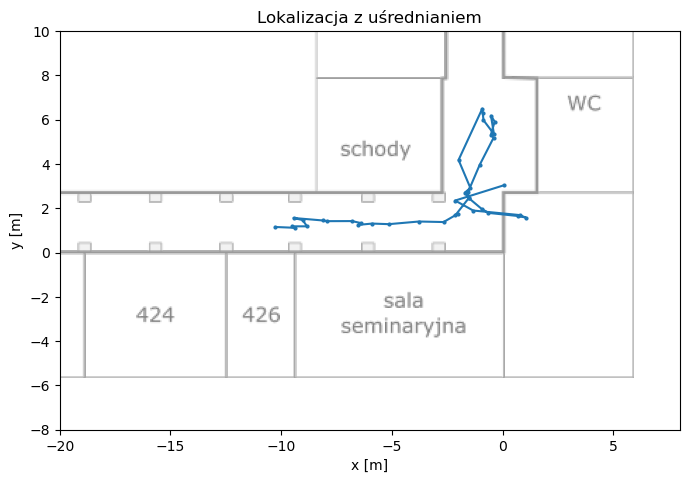

In [85]:
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')

implot = plt.imshow(im, extent = [-54.17, 5.90, -5.67 ,51.47])
plt.plot(locs_m[:,0], locs_m[:,1], marker='o', markersize=2)

plt.title('Punkty pomiarowe')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Lokalizacja z uśrednianiem')
plt.xlim(-20, 8)
plt.ylim(-8, 10)
#plt.colorbar(shrink=0.5, label='RSSI [dBm]')
#plt.scatter(anchor_x, anchor_y, color = 'red', marker = 'x', s=50)